## Prediction task is to determine whether a person makes over 50K a year.

#### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Exploratory data analysis
- Data Cleaning
- Data Pre-Processing
- Model Training
- Choose best model 

### Data Set Information:

Extraction was done by Barry Becker from the 1994 Census database. A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))

### Attribute Information:

- Listing of attributes:

>50K, <=50K.

- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands. 

### Data Collection and EDA 


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import os
os.listdir()

['.ipynb_checkpoints',
 '1.DATA CLEANING.ipynb',
 '2.Mongo DB store and retrive data.ipynb',
 '3.Model Building.ipynb',
 'Data']

In [3]:
column_names=['age','workclass',"fnlwgt","education",'education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','50K, <=50K.']

In [4]:
df=pd.read_csv('Data\Train_data.txt',names=column_names)

In [5]:
df.rename(columns={"50K, <=50K.":"class"},inplace=True)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  class           32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
class             0
dtype: int64

In [8]:
df.to_csv("Data\Data_Train.csv")

In [9]:
import numpy as np
for i in df.columns:
    l=["?"," "]
    df[i] =np.where(df[i].isin(l),np.nan,df[i])

In [10]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
class             0
dtype: int64

In [11]:
df['age'] = np.where(df['age'] == "?",np.nan, df["age"])

In [12]:
df.age.isna().sum()

0

In [13]:
df['workclass'] = np.where(df['workclass'] == "?",np.nan, df["workclass"])

In [14]:
df.workclass.isna().sum()


0

In [15]:

df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
class             0
dtype: int64

In [16]:
for i in df.columns:
    print(i,'>> ' ,df[i].nunique())

age >>  73
workclass >>  9
fnlwgt >>  21648
education >>  16
education-num >>  16
marital-status >>  7
occupation >>  15
relationship >>  6
race >>  5
sex >>  2
capital-gain >>  119
capital-loss >>  92
hours-per-week >>  94
native-country >>  42
class >>  2


In [17]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
class             0
dtype: int64

In [18]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 6 numerical features : ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

We have 9 categorical features : ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'class']


In [19]:
for i in categorical_features:
    print(i,">>>  ",df[i].unique(),"\n\n")

workclass >>>   [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' nan' ' Self-emp-inc' ' Without-pay' ' Never-worked'] 


education >>>   [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th'] 


marital-status >>>   [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed'] 


occupation >>>   [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' nan'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv'] 


relationship >>>   [' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative'] 


race >>>   [' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other'] 


sex >>>   [' Male' ' Female'

#### As we can see spaces we try to removes the spaces  

In [20]:
## Strip the categorical feature columns
for i in categorical_features:
    df[i]=df[i].str.strip()

In [21]:
 for i in categorical_features:
    print(i,">>>  ",df[i].unique(),"\n")

workclass >>>   ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' 'nan'
 'Self-emp-inc' 'Without-pay' 'Never-worked'] 

education >>>   ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th'] 

marital-status >>>   ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed'] 

occupation >>>   ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' 'nan'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv'] 

relationship >>>   ['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative'] 

race >>>   ['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other'] 

sex >>>   ['Male' 'Female'] 

native-country >>>   ['United-States' 'Cuba' 'Jamaica' 'India' 

In [22]:
for i in df.columns:
    l=["?"," "]
    df[i] =np.where(df[i]=="?",np.nan,df[i])

In [23]:
#df.replace('?', np.nan, inplace = True)

In [24]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
class             0
dtype: int64

In [25]:
# Check for the duplicate enteries in the dataset 
print(df.duplicated().sum())
# We found 24 duplicated Entries  


24


In [26]:
# Droping the duplciate entries
df.drop_duplicates(inplace=True)

In [27]:
df_copy=df.copy()

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32537 non-null  float64
 1   workclass       32537 non-null  object 
 2   fnlwgt          32537 non-null  float64
 3   education       32537 non-null  object 
 4   education-num   32537 non-null  float64
 5   marital-status  32537 non-null  object 
 6   occupation      32537 non-null  object 
 7   relationship    32537 non-null  object 
 8   race            32537 non-null  object 
 9   sex             32537 non-null  object 
 10  capital-gain    32537 non-null  float64
 11  capital-loss    32537 non-null  float64
 12  hours-per-week  32537 non-null  float64
 13  native-country  32537 non-null  object 
 14  class           32537 non-null  object 
dtypes: float64(6), object(9)
memory usage: 4.0+ MB


In [29]:
null_df = pd.DataFrame({'Null Values' : df.isna().sum().sort_values(ascending=False), 'Percentage Null Values' : (df.isna().sum().sort_values(ascending=False)) / (df.shape[0]) * (100)})
null_df

,Null Values,Percentage Null Values
age,0,0.0
workclass,0,0.0
fnlwgt,0,0.0
education,0,0.0
education-num,0,0.0
marital-status,0,0.0
occupation,0,0.0
relationship,0,0.0
race,0,0.0
sex,0,0.0


In [30]:
# Since the missing values are less so we can drop the missing values 

In [31]:
df.dropna(inplace=True)

In [32]:
df.shape

(32537, 15)

In [33]:
df_copy.shape

(32537, 15)

#### Compare the variance of the droped rows and undroped rows 

In [34]:
df_copy.isna().sum()>0

age               False
workclass         False
fnlwgt            False
education         False
education-num     False
marital-status    False
occupation        False
relationship      False
race              False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country    False
class             False
dtype: bool

In [35]:
features_with_null_values=['workclass','occupation','native-country']

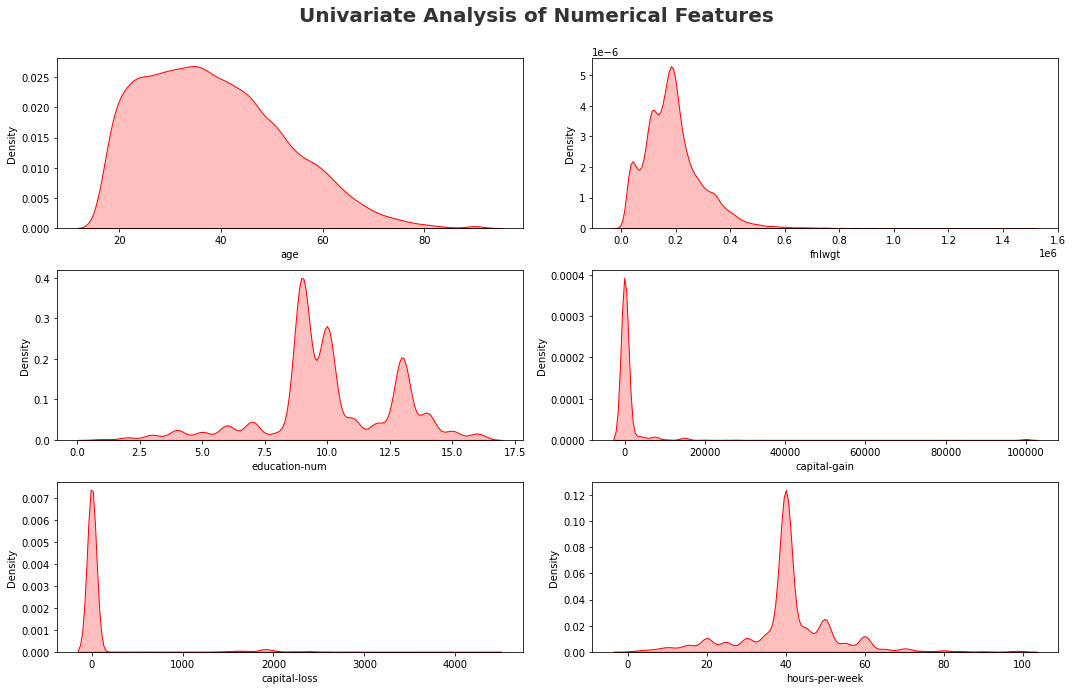

In [36]:
import seaborn as sns
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(5, 2, i+1)
    sns.kdeplot(x=df[numeric_features[i]],shade=True, color='r')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

<AxesSubplot:>

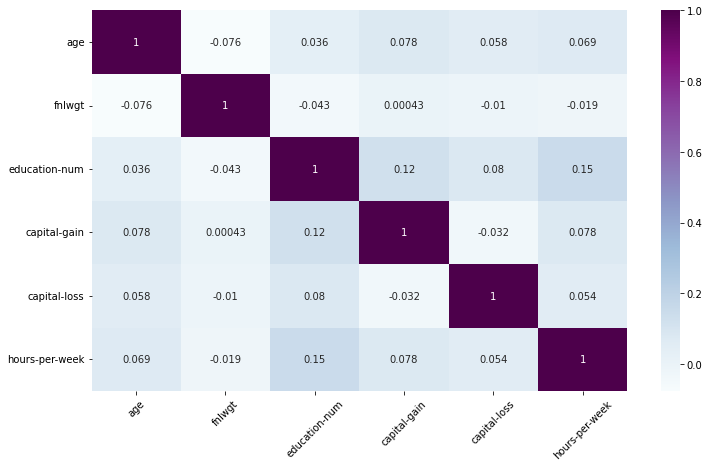

In [37]:
plt.figure(figsize=(12,7))
cor=df.corr()
plt.xticks(rotation=45)
plt.yticks(rotation=45,)
sns.heatmap(cor,cmap="BuPu",annot=True,)

In [38]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'class'],
      dtype='object')

In [39]:
numeric_features

['age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

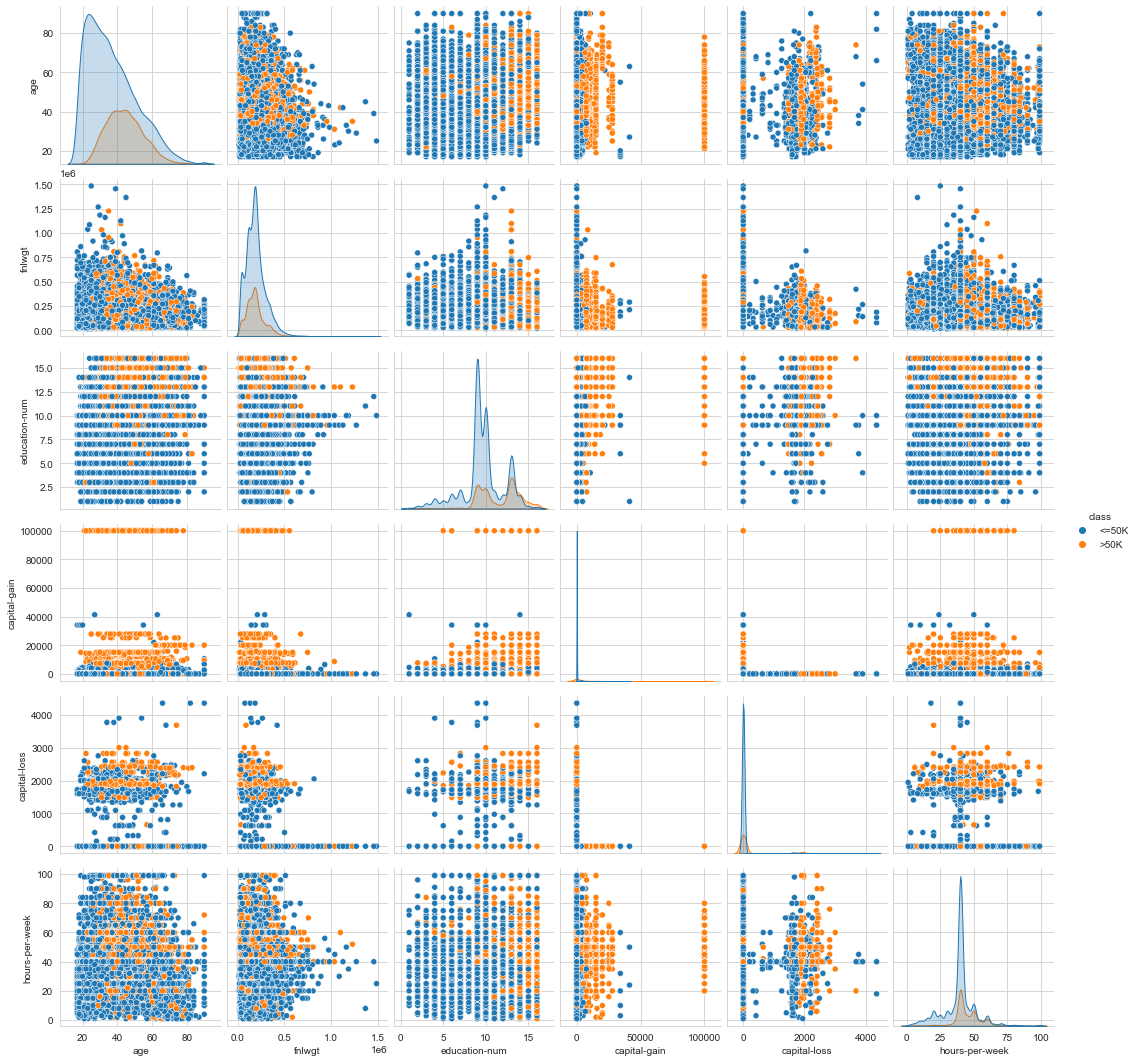

In [40]:
sns.set_style("whitegrid");

sns.pairplot(df,hue="class");
plt.show()

In [41]:
## Data is imbalance 
df["class"].value_counts()

<=50K    24698
>50K      7839
Name: class, dtype: int64

In [42]:
for features in numeric_features:
    print(features,">> ",df[features].var())

age >>  185.99459445005203
fnlwgt >>  11142168571.978065
education-num >>  6.613296338486361
capital-gain >>  54581914.90168636
capital-loss >>  162491.08781881648
hours-per-week >>  152.44567247565993


In [43]:
for features in numeric_features:
    print(features,">> ",df_copy[features].var())

age >>  185.99459445005203
fnlwgt >>  11142168571.978065
education-num >>  6.613296338486361
capital-gain >>  54581914.90168636
capital-loss >>  162491.08781881648
hours-per-week >>  152.44567247565993


In [44]:
for features in numeric_features:
    print(features,">> ",df_copy[features].skew())
    

age >>  0.5576631514973126
fnlwgt >>  1.4477029083495345
education-num >>  -0.30950025998998987
capital-gain >>  11.949402833551463
capital-loss >>  4.592702423271812
hours-per-week >>  0.22875887785250426


In [45]:
for features in numeric_features:
    print(features,">> ",df_copy[features].kurtosis())

age >>  -0.16984978541788598
fnlwgt >>  6.222006116215868
education-num >>  0.6190244991834937
capital-gain >>  154.68295431938128
capital-loss >>  20.358254224040184
hours-per-week >>  2.917718168965955


In [46]:
#

In [47]:
for feature in categorical_features:
    print(feature,">> \n",df[feature].value_counts(),"\n")

workclass >> 
 Private             22673
Self-emp-not-inc     2540
Local-gov            2093
nan                  1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64 

education >> 
 HS-grad         10494
Some-college     7282
Bachelors        5353
Masters          1722
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           645
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           332
1st-4th           166
Preschool          50
Name: education, dtype: int64 

marital-status >> 
 Married-civ-spouse       14970
Never-married            10667
Divorced                  4441
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital-status, dtype: int64 

occupation >> 
 Prof-specialty       4136
Craf

In [48]:
# categorical columns
def count_plot(x):
    plt.figure(figsize=(15,8))
    plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
    sns.countplot(x=df[x],palette="Set2",order=df[i].value_counts().index)
    plt.xlabel(x)
    plt.xticks(rotation=45)

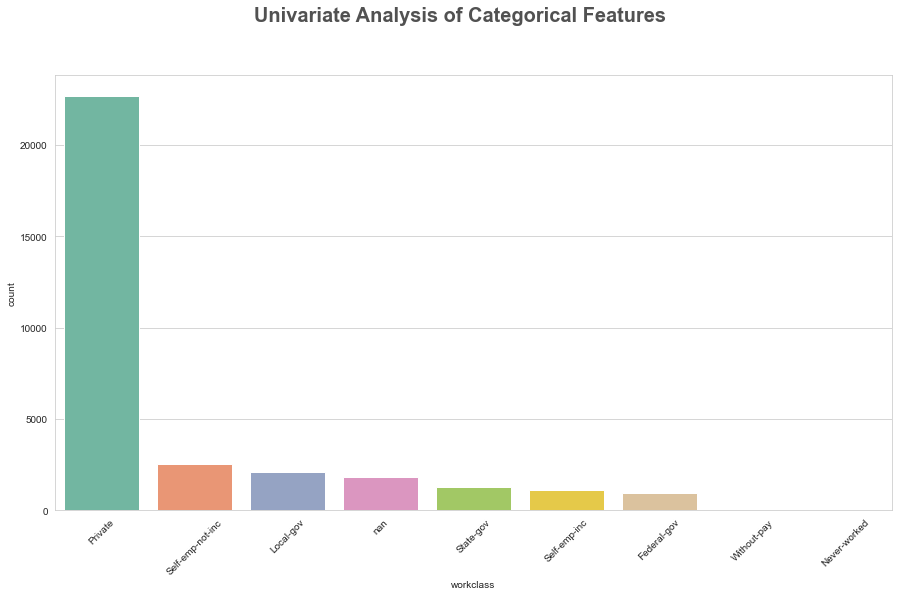

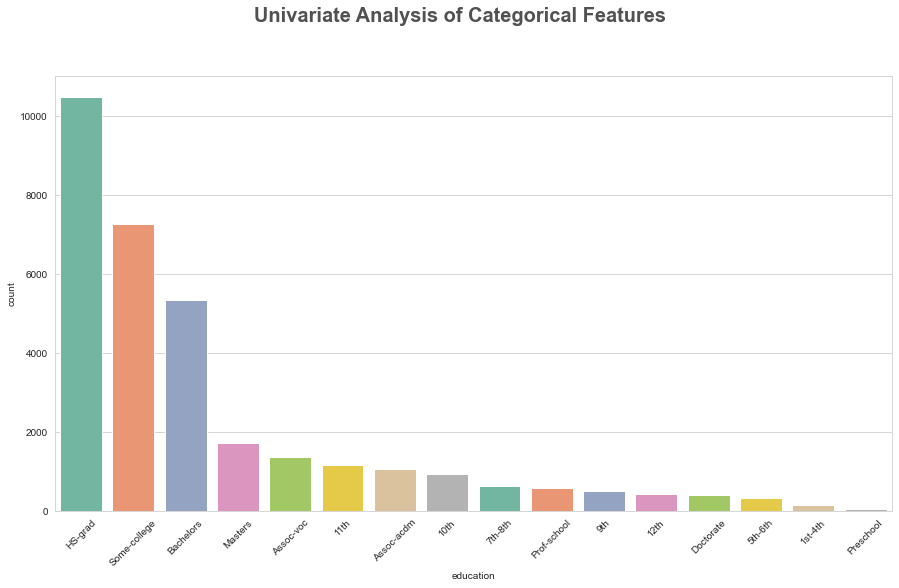

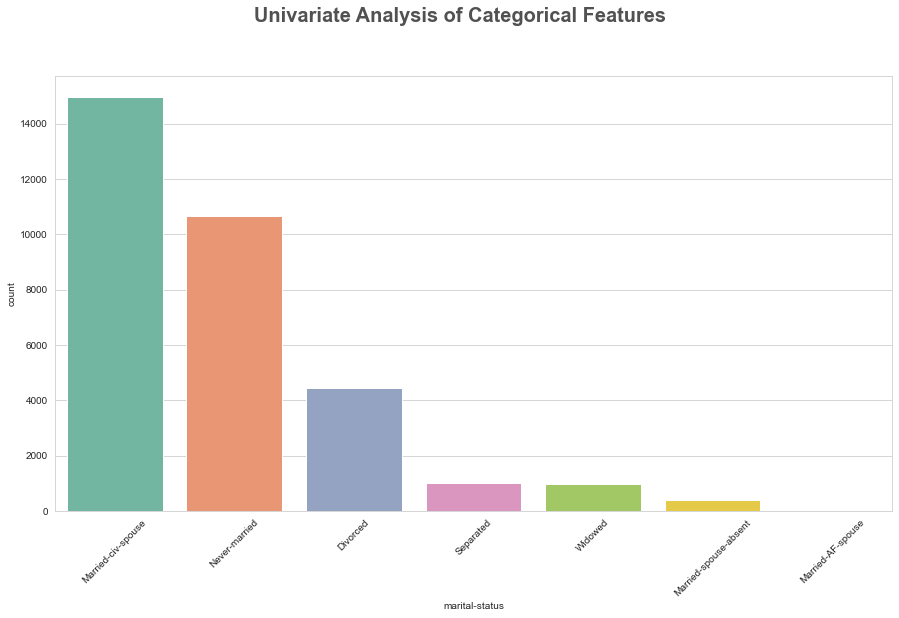

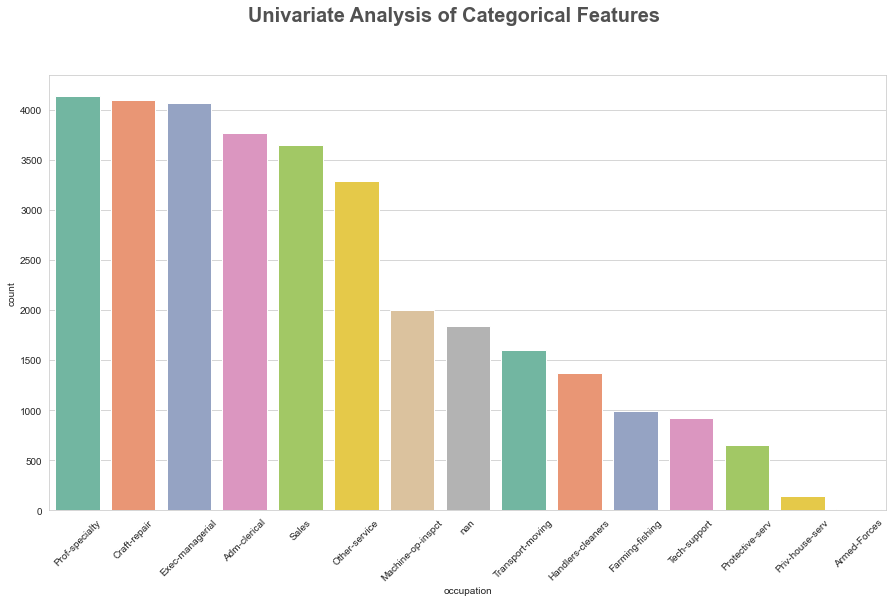

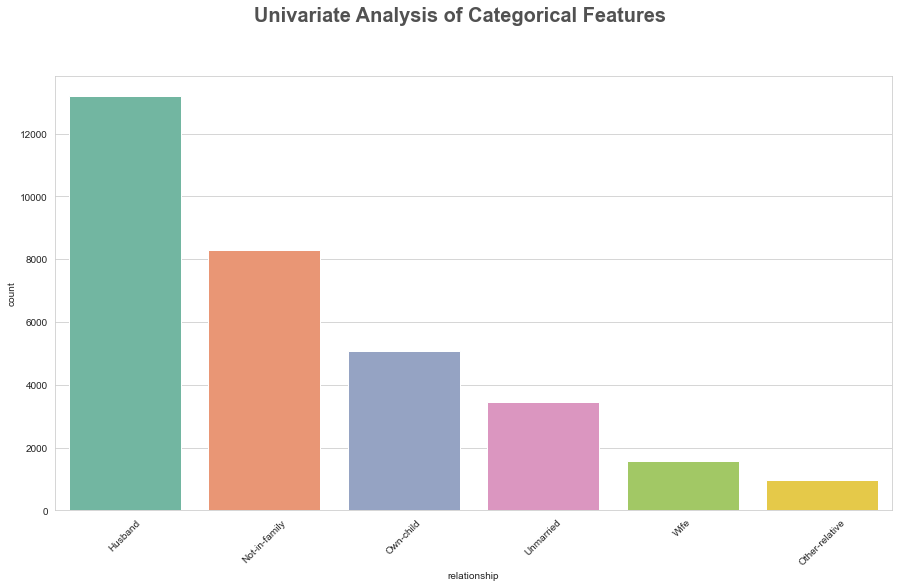

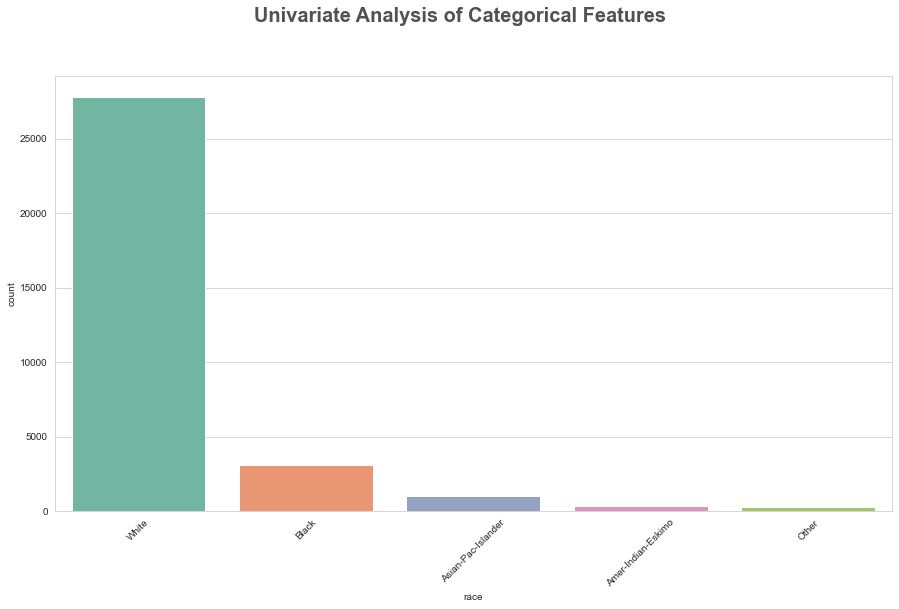

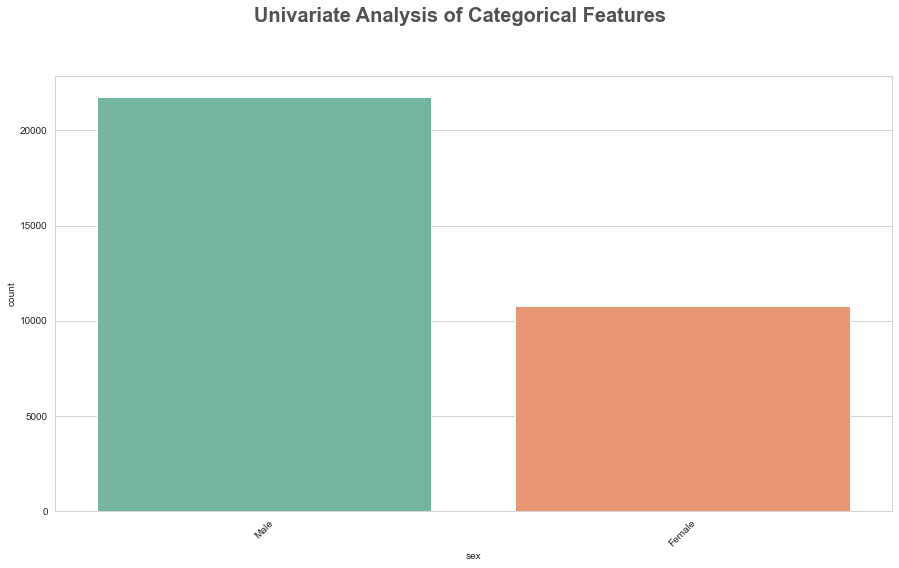

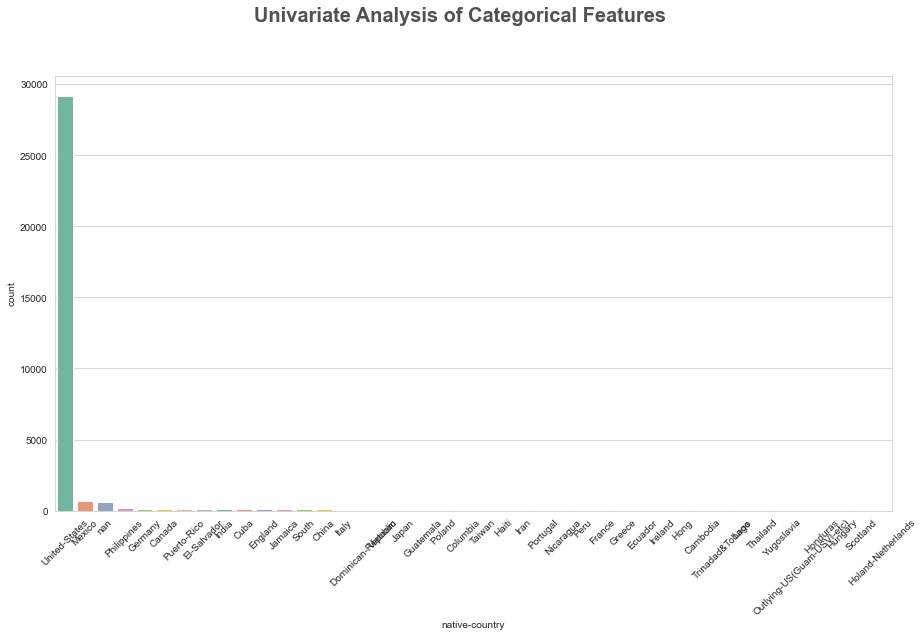

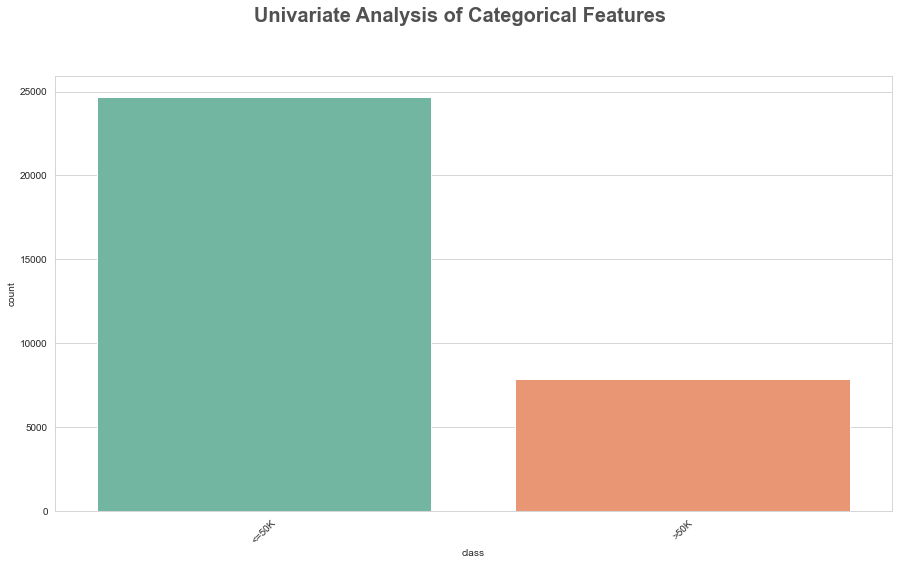

In [49]:
for i in categorical_features:
    count_plot(i)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'HS-grad'),
  Text(1, 0, 'Some-college'),
  Text(2, 0, 'Bachelors'),
  Text(3, 0, 'Masters'),
  Text(4, 0, 'Assoc-voc'),
  Text(5, 0, '11th'),
  Text(6, 0, 'Assoc-acdm'),
  Text(7, 0, '10th'),
  Text(8, 0, '7th-8th'),
  Text(9, 0, 'Prof-school'),
  Text(10, 0, '9th'),
  Text(11, 0, '12th'),
  Text(12, 0, 'Doctorate'),
  Text(13, 0, '5th-6th'),
  Text(14, 0, '1st-4th'),
  Text(15, 0, 'Preschool')])

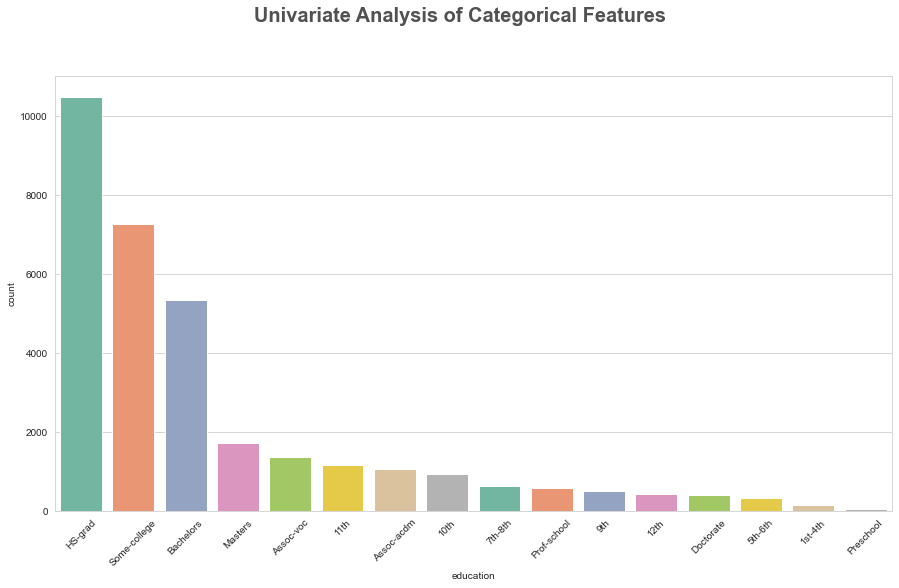

In [50]:
plt.figure(figsize=(15,8))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
sns.countplot(x=df['education'],palette="Set2",order=df["education"].value_counts().index)
plt.xlabel("education")
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, '9.0'),
  Text(1, 0, '10.0'),
  Text(2, 0, '13.0'),
  Text(3, 0, '14.0'),
  Text(4, 0, '11.0'),
  Text(5, 0, '7.0'),
  Text(6, 0, '12.0'),
  Text(7, 0, '6.0'),
  Text(8, 0, '4.0'),
  Text(9, 0, '15.0'),
  Text(10, 0, '5.0'),
  Text(11, 0, '8.0'),
  Text(12, 0, '16.0'),
  Text(13, 0, '3.0'),
  Text(14, 0, '2.0'),
  Text(15, 0, '1.0')])

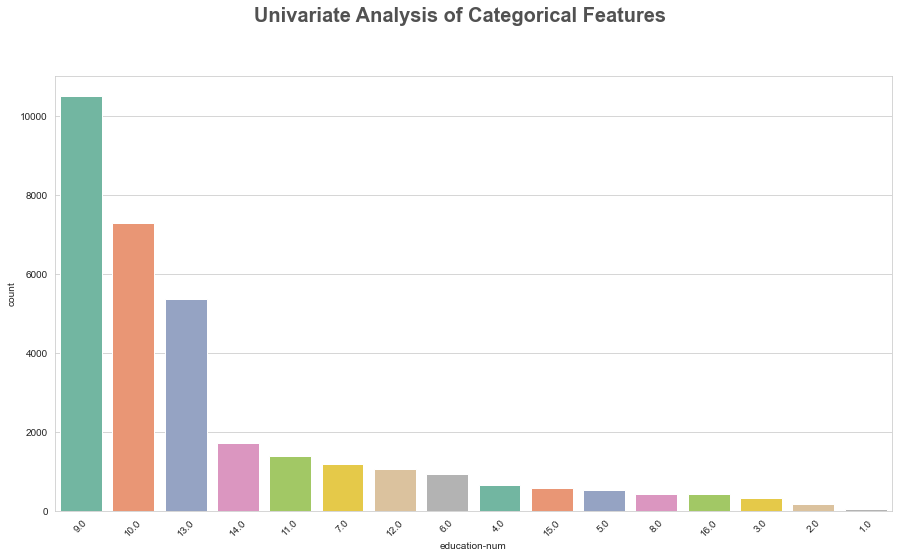

In [51]:
plt.figure(figsize=(15,8))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
sns.countplot(x=df['education-num'],palette="Set2",order=df["education-num"].value_counts().index)
plt.xlabel("education-num")
plt.xticks(rotation=45)

In [52]:
df.education.unique()

array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
       '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object)

In [53]:
edu_df=pd.DataFrame({"Education_number":df["education-num"].value_counts()})
edu_df['Education']=df.education.unique()

In [54]:
edu_df.rename({"Education_number":"Count"},axis=1,inplace=True)
edu_df
# since Education number and education is same so we drop education column

,Count,Education
9.0,10494,Bachelors
10.0,7282,HS-grad
13.0,5353,11th
14.0,1722,Masters
11.0,1382,9th
7.0,1175,Some-college
12.0,1067,Assoc-acdm
6.0,933,Assoc-voc
4.0,645,7th-8th
15.0,576,Doctorate


In [55]:
df.drop("education",axis=1,inplace=True)
df

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39.0,State-gov,77516.0,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311.0,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38.0,Private,215646.0,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53.0,Private,234721.0,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28.0,Private,338409.0,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27.0,Private,257302.0,12.0,Married-civ-spouse,Tech-support,Wife,White,Female,0.0,0.0,38.0,United-States,<=50K
32557,40.0,Private,154374.0,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
32558,58.0,Private,151910.0,9.0,Widowed,Adm-clerical,Unmarried,White,Female,0.0,0.0,40.0,United-States,<=50K
32559,22.0,Private,201490.0,9.0,Never-married,Adm-clerical,Own-child,White,Male,0.0,0.0,20.0,United-States,<=50K


In [56]:
categorical_features.remove("education")

In [57]:
categorical_features

['workclass',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country',
 'class']

In [58]:
## 
from sklearn.preprocessing import LabelEncoder

In [59]:
# Storing the Label data as joblib
from joblib import dump, load
label=LabelEncoder()
for i in categorical_features:
    data =label.fit(df[i])
    df[i]=label.transform(df[i])
    # Name of the file
    joblib_file = '{}.joblib'.format(i)
    with open(joblib_file, 'wb') as f:
        dump(data, f)
    

In [60]:
import os
os.listdir()

['.ipynb_checkpoints',
 '1.DATA CLEANING.ipynb',
 '2.Mongo DB store and retrive data.ipynb',
 '3.Model Building.ipynb',
 'class.joblib',
 'Data',
 'marital-status.joblib',
 'native-country.joblib',
 'occupation.joblib',
 'race.joblib',
 'relationship.joblib',
 'sex.joblib',
 'workclass.joblib']

<AxesSubplot:>

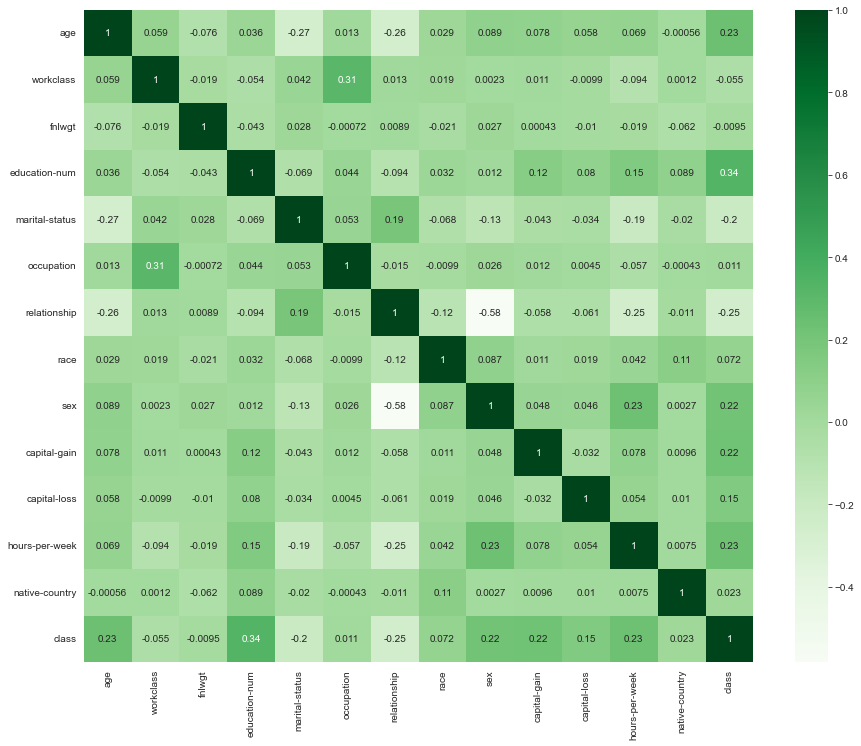

In [61]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(),cmap="Greens",annot=True)

In [62]:
def create_comparison_plot(df,column):
    # Comparing
    plt.figure(figsize=(16,8))
    plt.subplot(2,2,1)
    sns.distplot(df[column])

    plt.subplot(2,2,2)
    sns.boxplot(df[column],color="g")


    plt.show()

In [63]:
numeric_features

['age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

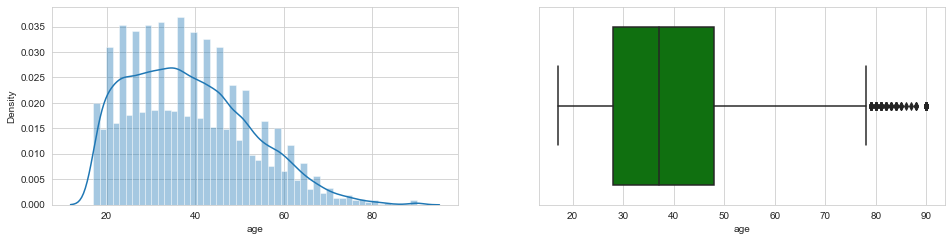

In [64]:
create_comparison_plot(df,'age')

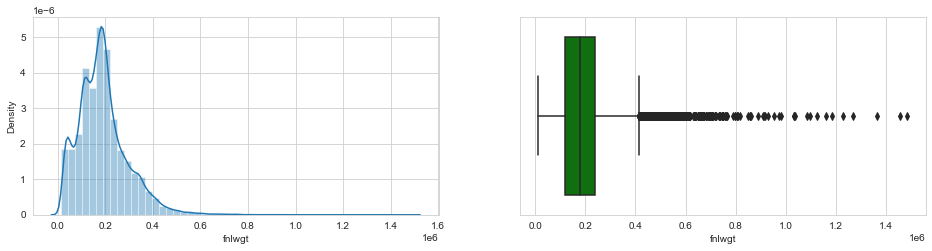

In [65]:
create_comparison_plot(df,'fnlwgt')

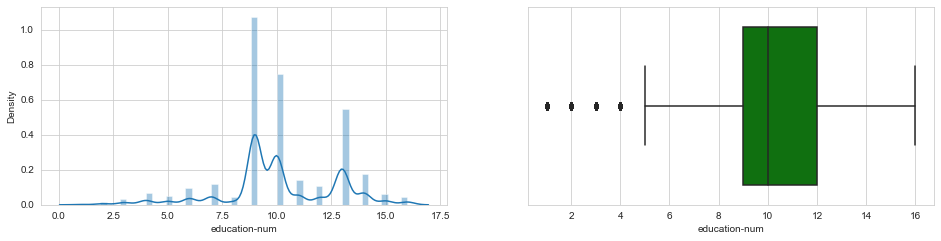

In [66]:
create_comparison_plot(df,'education-num')

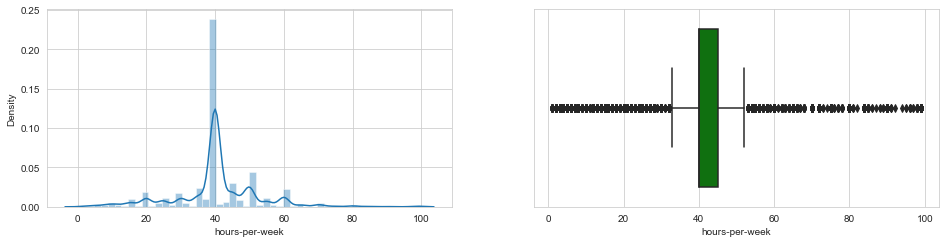

In [67]:
create_comparison_plot(df,'hours-per-week')

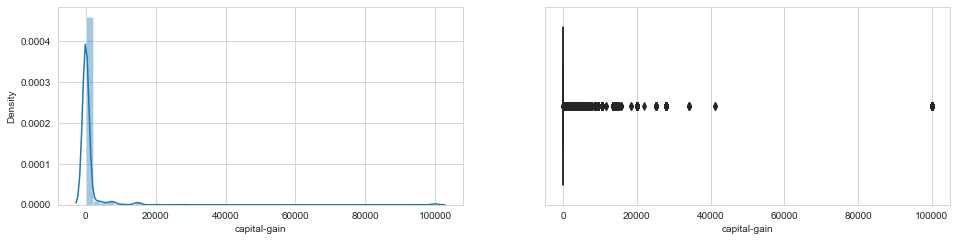

In [68]:
create_comparison_plot(df,'capital-gain')

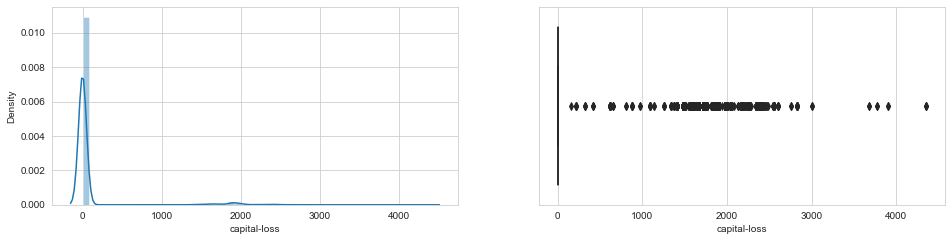

In [69]:
create_comparison_plot(df,'capital-loss')

In [70]:
categorical_features

['workclass',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country',
 'class']

<AxesSubplot:ylabel='Frequency'>

<Figure size 432x288 with 0 Axes>

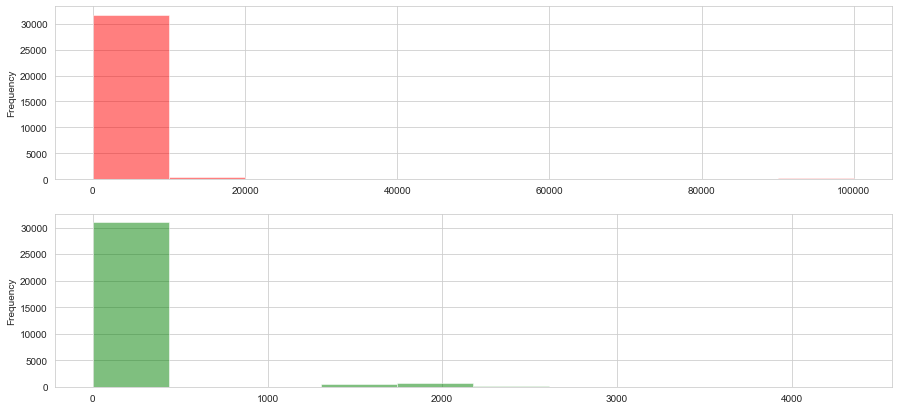

In [71]:
fig= plt.figure()

# density plot using seaborn library
fig, axs = plt.subplots(2, 1, figsize=(15, 7))

df['capital-gain'].plot.hist(color='red',ax=axs[0],alpha=0.5,label='Size')
df['capital-loss'].plot.hist(color='green',ax=axs[1],alpha=0.5,label='Size')


In [73]:
df.to_csv("Data\Processed_data.csv",index=False)

In [74]:
import json
data=df.to_json(orient="records")
# the json file where the output must be stored
out_file = open("processed1.json", "w")

json.dump(data, out_file, indent = 6)

out_file.close()


In [75]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'class'],
      dtype='object')